#### Module 8- Measures of Location and Spread
author: Radley Rigonan

This module is the first in a series of modules that explore data and statistical analysis.  In this case, we will be using DoseNet data to improve our understanding of central tendency.

I will be using DoseNet data from the following link:
https://radwatch.berkeley.edu/sites/default/files/dosenet/etch.csv

In [2]:
%matplotlib inline
import csv
import io
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
from datetime import datetime

url = 'https://radwatch.berkeley.edu/sites/default/files/dosenet/etch.csv'
response = urllib.request.urlopen(url)
reader = csv.reader(io.TextIOWrapper(response))  
timedata = []    
cpm = []
line = 0
for row in reader:
    if line != 0:
        timedata.append(datetime.fromtimestamp(float(row[2],)))
        cpm.append(float(row[6]))
    line += 1

Measures of central tendency identify values that lie on the center of a sample and help statisticians summarize their data. The most measures of central tendency are mean, median, and mode.  Although you should be familiar with these values, they are defined as:

MEAN = sum(sample) / len(sample)

MEDIAN = sorted(sample)[len(sample)/2]

MODE: element(s) with highest frequency

In [3]:
mean_cpm1 = sum(cpm)/len(cpm)
print('mean CPM from its definition is: %s' %mean_cpm1)

mean_cpm2 = np.mean(cpm)
print('mean CPM from built-in function is: %s' %mean_cpm2)

mean CPM from its definition is: 2.4348701870697123
mean CPM from built-in function is: 2.43487018707


In [4]:
if len(cpm)%2 == 0:
    median_cpm1 = sorted(cpm)[int(len(cpm)/2)]
else:
    median_cpm1 = (sorted(cpm)[int((len(cpm)+1)/2)]+sorted(cpm)[int((len(cpm)-1)/2)]) / 2
print('median CPM from its definition is: %s' %median_cpm1)

median_cpm2 = np.median(cpm)
print('median CPM from built-in function is: %s' %median_cpm2)

median CPM from its definition is: 2.4
median CPM from built-in function is: 2.4


In [5]:
from collections import Counter
counter = Counter(cpm)
_,val = counter.most_common(1)[0]
mode_cpm1 = [i for i, target in counter.items() if target == val]
print('mode(s) CPM from its definition is: %s' %mode_cpm1)

import statistics                   # note: this function fails if there are two statistical modes
mode_cpm2 = statistics.mode(cpm)
print('mode(s) CPM from built-in function is: %s' %mode_cpm2)

mode(s) CPM from its definition is: [2.4]
mode(s) CPM from built-in function is: 2.4


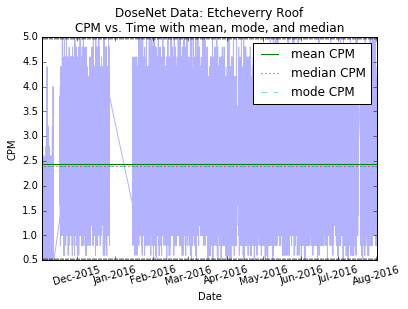

In [6]:
fig, ax = plt.subplots()
ax.plot(timedata,cpm,alpha=0.3)         # alpha modifier adds transparency, I add this so the CPM plot doesn't overpower the mean, median, and mode
ax.plot([timedata[0],timedata[-1]], [mean_cpm1,mean_cpm1], label='mean CPM')
ax.plot([timedata[0],timedata[-1]], [median_cpm1,median_cpm1], 'r:', label='median CPM')
ax.plot([timedata[0],timedata[-1]], [mode_cpm1,mode_cpm1], 'c--', label='mode CPM',alpha=0.5)
plt.legend(loc='best')
plt.ylim(ymax = 5, ymin = .5)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
plt.xticks(rotation=15)

plt.title('DoseNet Data: Etcheverry Roof\nCPM vs. Time with mean, mode, and median')
plt.ylabel('CPM')
plt.xlabel('Date')

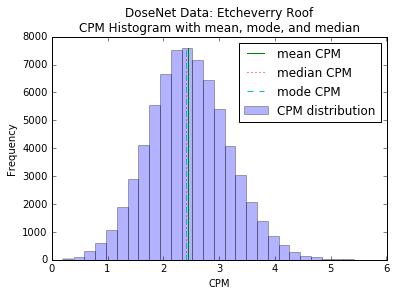

In [7]:
fig, ax = plt.subplots()
y,x, _ = plt.hist(cpm,bins=30, alpha=0.3, label='CPM distribution')
ax.plot([mean_cpm1,mean_cpm1], [0,y.max()],label='mean CPM')
ax.plot([median_cpm1, median_cpm1], [0,y.max()], 'r:', label='median CPM')
ax.plot([mode_cpm1,mode_cpm1], [0,y.max()], 'c--', label='mode CPM')

plt.legend(loc='best')
plt.title('DoseNet Data: Etcheverry Roof\nCPM Histogram with mean, mode, and median')
plt.ylabel('Frequency')
plt.xlabel('CPM')

As you can see from the timeseries plot and the histogram, mean, median, and mode can generally gauge the central values in a set of sample data.  This is especially true for radiation data: radiation is a stochastic process (it changes and fluctuates over time), but background radiation measured by DoseNet devices trends towards an average point.